In [2]:
import sys
sys.version

import exoplanet
print(f"exoplanet.__version__ = '{exoplanet.__version__}'")



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import exoplanet as xo
import pymc3 as pm
import pymc3_ext as pmx
from astropy import units as u
from astropy.constants import M_earth, M_sun
from simulate import *
from model import *
import pickle
from collections import defaultdict

import matplotlib 
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)


exoplanet.__version__ = '0.5.1'


In [156]:
folder = './traces/Sep22/'

'''
files = [
    'period1000_inc10_gaia60_roman5.pkl',
    'period1000_inc10_gaia60_roman10.pkl',
    'period1000_inc10_gaia60_roman20.pkl',
    'period1000_inc10_gaia60_romanNA.pkl',
    'period1000_inc45_gaia60_roman5.pkl',
    'period1000_inc45_gaia60_roman10.pkl',
    'period1000_inc45_gaia60_roman20.pkl',
    'period1000_inc45_gaia60_romanNA.pkl',
    'period1000_inc80_gaia60_roman5.pkl',
    'period1000_inc80_gaia60_roman10.pkl',
    'period1000_inc80_gaia60_roman20.pkl',
    'period1000_inc80_gaia60_romanNA.pkl',
    'period4327_inc10_gaia60_roman5.pkl',
    'period4327_inc10_gaia60_roman10.pkl',
    'period4327_inc10_gaia60_roman20.pkl',
    'period4327_inc10_gaia60_romanNA.pkl',
    'period4327_inc45_gaia60_roman5.pkl',
    'period4327_inc45_gaia60_roman10.pkl',
    'period4327_inc45_gaia60_roman20.pkl',
    'period4327_inc45_gaia60_romanNA.pkl',
    'period4327_inc80_gaia60_roman5.pkl',
    'period4327_inc80_gaia60_roman10.pkl',
    'period4327_inc80_gaia60_roman20.pkl',
    'period4327_inc80_gaia60_romanNA.pkl',
    'period10000_inc10_gaia60_roman5.pkl',
    'period10000_inc10_gaia60_roman10.pkl',
    'period10000_inc10_gaia60_roman20.pkl',
    'period10000_inc10_gaia60_romanNA.pkl',
    'period10000_inc45_gaia60_roman5.pkl',
    'period10000_inc45_gaia60_roman10.pkl',
    'period10000_inc45_gaia60_roman20.pkl',
    'period10000_inc45_gaia60_romanNA.pkl',
    'period10000_inc80_gaia60_roman5.pkl',
    'period10000_inc80_gaia60_roman10.pkl',
    'period10000_inc80_gaia60_roman20.pkl',
    'period10000_inc80_gaia60_romanNA.pkl'
]
'''

files = [
    'period4327_inc45_gaia60_romanNA.pkl',
    'period4327_inc45_gaia60_romanNA.pkl',
    'period4327_inc45_gaia60_roman20_10.pkl',
    'period4327_inc45_gaia60_roman20_5.pkl',
    'period4327_inc45_gaia60_roman10_10.pkl',
    'period4327_inc45_gaia60_roman10_5.pkl',
    'period4327_inc45_gaia60_roman5_10.pkl',
    'period4327_inc45_gaia60_roman5_5.pkl'
]

#periods = [1000., 4327.631, 10000.]
#incs = [10., 45., 80.]
#roman_errs = [5e-6, 10e-6, 20e-6, None]

periods = [4327]
incs = [45.]
roman_errs = [None, 20e-6, 10e-6, 5e-6]
roman_durations = [10, 5]

index = -1
params_earth = defaultdict(list)
params_jup = defaultdict(list)
params_earth_err = defaultdict(list)
params_jup_err = defaultdict(list)
for period_jup in periods:
    for inc_earth in incs:
        for roman_err in roman_errs:
            for roman_duration in roman_durations:
                index += 1
                file = files[index]




                with open(folder+file, 'rb') as buff:
                    data = pickle.load(buff)  

                model, trace = data['model'], data['trace']

                parameters = ["m_planet", "P"]

                #print("")
                #print("true values:")
                #print("Jupiter period = " + str(period_jup))
                #print("Earth inclindation = " + str(np.radians(inc_earth)))
                #print("")

                print("")
                print("")
                print("")
                print(file)
                for param in parameters:


                    planet1_med = np.median(trace.posterior[param].values[:, :, 0])
                    planet2_med = np.median(trace.posterior[param].values[:, :, 1])

                    planet1_quantile = [np.quantile(trace.posterior[param].values[:, :, 0], 0.16),
                                        np.quantile(trace.posterior[param].values[:, :, 0], 0.84)]
                    
                    planet2_quantile = [np.quantile(trace.posterior[param].values[:, :, 1], 0.16),
                                        np.quantile(trace.posterior[param].values[:, :, 1], 0.84)]

                    planet1_err = np.array([
                        [planet1_med - planet1_quantile[0]  ],
                        [planet1_quantile[1] - planet1_med]
                    ])
                    
                    planet2_err = np.array([
                        [planet2_med - planet2_quantile[0]  ],
                        [planet2_quantile[1] - planet2_med]
                    ])
                    
                    print(param + "_earth: " + str(planet1_med) + " -/+ " + str(planet1_err))
                    print(param + "_jup: " + str(planet2_med) + "-/+" + str(planet2_err))

                    params_earth[param].append(planet1_med)
                    params_jup[param].append(planet2_med)

                    params_earth_err[param].append(planet1_err)
                    params_jup_err[param].append(planet2_err)

                    print("")

        
        
        

    






period4327_inc45_gaia60_romanNA.pkl
m_planet_earth: 4.524990623708748 -/+ [[ 3.40320292]
 [15.19261551]]
m_planet_jup: 315.0198807214822-/+[[5.56199078]
 [5.75496699]]

P_earth: 293.43507576521785 -/+ [[0.60837872]
 [1.01241331]]
P_jup: 4339.178337882222-/+[[3.99495888]
 [4.17162943]]




period4327_inc45_gaia60_romanNA.pkl
m_planet_earth: 4.524990623708748 -/+ [[ 3.40320292]
 [15.19261551]]
m_planet_jup: 315.0198807214822-/+[[5.56199078]
 [5.75496699]]

P_earth: 293.43507576521785 -/+ [[0.60837872]
 [1.01241331]]
P_jup: 4339.178337882222-/+[[3.99495888]
 [4.17162943]]




period4327_inc45_gaia60_roman20_10.pkl
m_planet_earth: 5.52496268081299 -/+ [[ 4.28027326]
 [16.63374854]]
m_planet_jup: 323.7007723257299-/+[[3.97827821]
 [3.85179029]]

P_earth: 302.99653346568255 -/+ [[2.37726201]
 [2.35074341]]
P_jup: 4327.514069319623-/+[[3.58868446]
 [3.26607193]]




period4327_inc45_gaia60_roman20_5.pkl
m_planet_earth: 2.5308943765902896 -/+ [[1.38282344]
 [5.10729896]]
m_planet_jup: 322.8

In [157]:
from pylab import *

cmap = cm.get_cmap('winter', len(files))    # PiYG

colors = []
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    colors.append(matplotlib.colors.rgb2hex(rgba))
    
    
ys = np.linspace(1, 0, len(files))


In [158]:
colors = [
    "#1c245f", "#1c245f", 
    "#530031", "#530031", 
    "#ffc052", "#ffc052", 
    "#01792d", "#01792d"]

<ipython-input-169-f05c9355d91f>:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


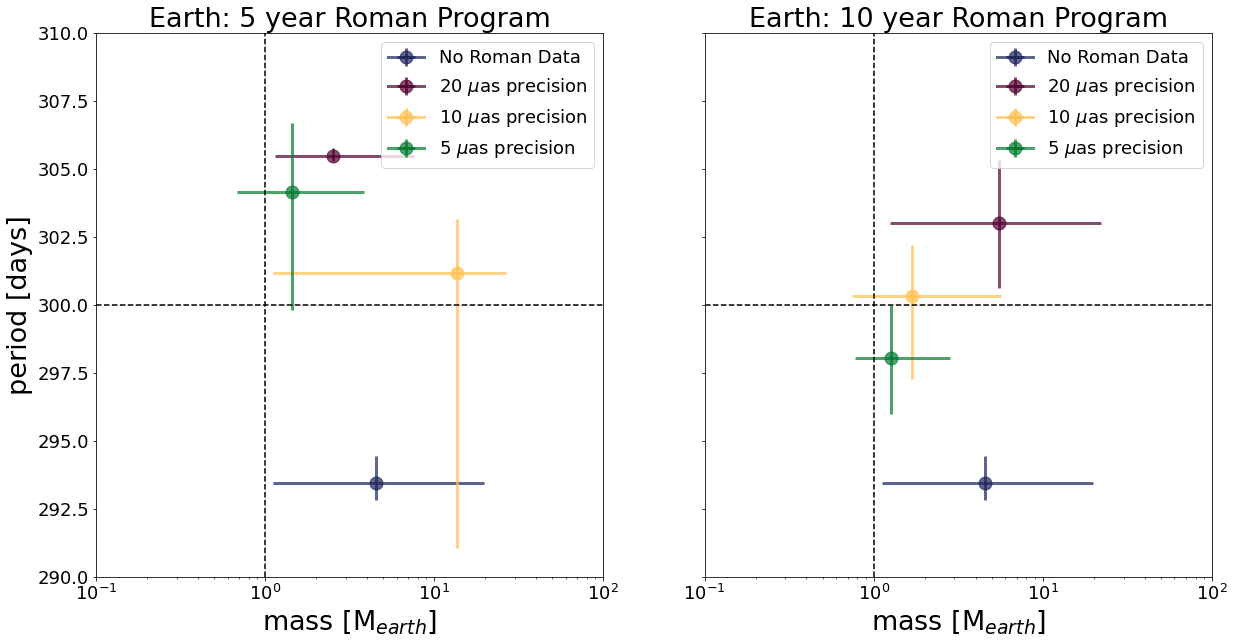

In [169]:


xs = params_earth['m_planet']
xs_err = params_earth_err['m_planet']

ys = params_earth['P']
ys_err = params_earth_err['P']

roman_errs_double = ['No Roman Data', 'No Roman Data', 
                     r'20 $\mu$as precision', r'20 $\mu$as precision', 
                     r'10 $\mu$as precision', r'10 $\mu$as precision', 
                     r'5 $\mu$as precision', r'5 $\mu$as precision']


fig, axs = plt.subplots(1, 2, figsize=[20, 10], sharey=True)

    
xmin = .1
xmax = 100

for ii in range(0, len(files)):    
    x = xs[ii]
    x_err = xs_err[ii]
    y = ys[ii]
    y_err = ys_err[ii]
    
    roman_err = roman_errs_double[ii]
    color = colors[ii]
    if ii % 2 == 0:
        axs[1].errorbar(x, y, xerr=x_err, yerr = y_err, marker = 'o', 
                        color = color, label = roman_err, markersize=13,
                       linewidth = 3, alpha = 0.7)
    
    else:
        axs[0].errorbar(x, y, xerr=x_err, yerr = y_err, marker = 'o', 
                        color = color, label = roman_err, markersize=13,
                       linewidth = 3, alpha = 0.7)
        
    

axs[0].axvline(x=1, ymin=0, ymax=1, color = 'k', ls = '--')
axs[1].axvline(x=1, ymin=0, ymax=1, color = 'k', ls = '--')

axs[0].axhline(y=300, xmin=0, xmax=1, color = 'k', ls = '--')
axs[1].axhline(y=300, xmin=0, xmax=1, color = 'k', ls = '--')

axs[0].set_xlim(xmin,xmax)
axs[1].set_xlim(xmin,xmax)

axs[0].set_ylim(290, 310)

axs[0].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[1].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[0].set_ylabel(r'period [days]', fontsize = 27)

axs[0].set_xscale('log')
axs[1].set_xscale('log')

axs[0].set_title('Earth: 5 year Roman Program', fontsize = 27)
axs[1].set_title('Earth: 10 year Roman Program', fontsize = 27)

axs[0].legend(fontsize = 18, loc=1)
axs[1].legend(fontsize = 18, loc=1)



fig.show()


<ipython-input-165-140795cbbea4>:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


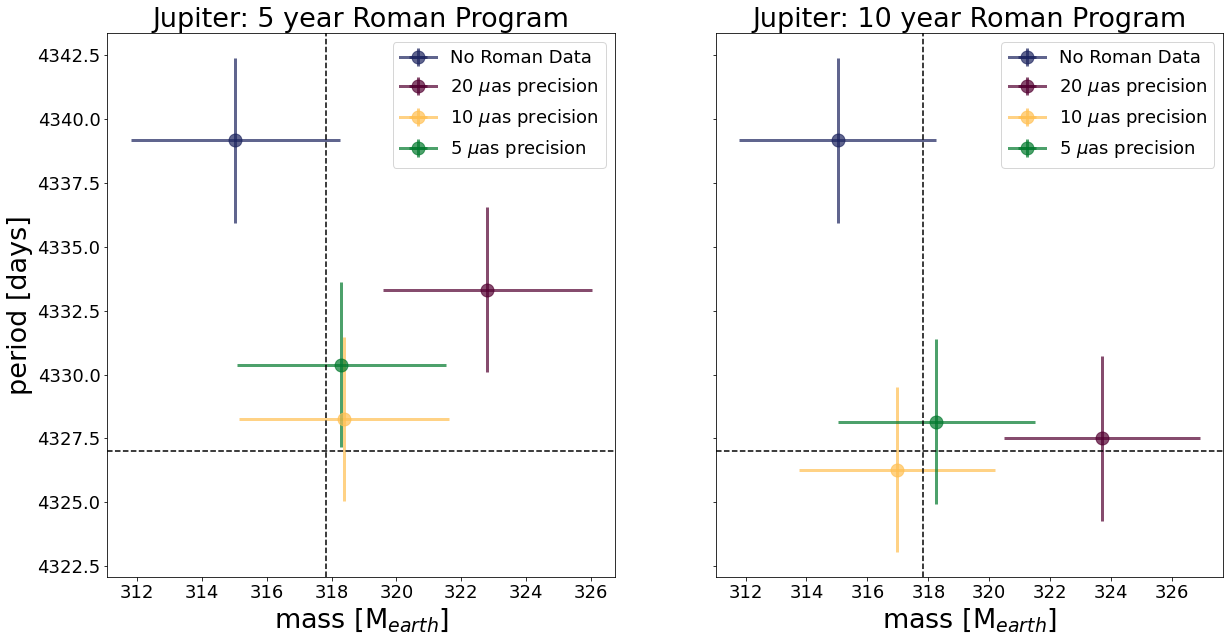

In [165]:


xs = params_jup['m_planet']
xs_err = params_jup_std['m_planet']

ys = params_jup['P']
ys_err = params_jup_std['P']


roman_errs_double = ['No Roman Data', 'No Roman Data', 
                     r'20 $\mu$as precision', r'20 $\mu$as precision', 
                     r'10 $\mu$as precision', r'10 $\mu$as precision', 
                     r'5 $\mu$as precision', r'5 $\mu$as precision']

fig, axs = plt.subplots(1, 2, figsize=[20, 10], sharey=True)

    
    


for ii in range(0, len(files)):    
    x = xs[ii]
    x_err = xs_err[ii]
    y = ys[ii]
    y_err = ys_err[ii]
    
    roman_err = roman_errs_double[ii]
    color = colors[ii]
    if ii % 2 == 0:
        axs[1].errorbar(x, y, xerr=x_err, yerr = y_err, marker = 'o', 
                        color = color, label = roman_err, markersize=13,
                       linewidth = 3, alpha = 0.7)
    
    else:
        axs[0].errorbar(x, y, xerr=x_err, yerr = y_err, marker = 'o', 
                        color = color, label = roman_err, markersize=13,
                       linewidth = 3, alpha = 0.7)
        
    

axs[0].axvline(x=317.83, ymin=0, ymax=1, color = 'k', ls = '--')
axs[1].axvline(x=317.83, ymin=0, ymax=1, color = 'k', ls = '--')

axs[0].axhline(y=4327, xmin=0, xmax=1, color = 'k', ls = '--')
axs[1].axhline(y=4327, xmin=0, xmax=1, color = 'k', ls = '--')

#axs[0].set_xlim(xmin,xmax)
#axs[1].set_xlim(xmin,xmax)

axs[0].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[1].set_xlabel(r'mass [M$_{earth}$]', fontsize = 27)
axs[0].set_ylabel(r'period [days]', fontsize = 27)



axs[0].set_title('Jupiter: 5 year Roman Program', fontsize = 27)
axs[1].set_title('Jupiter: 10 year Roman Program', fontsize = 27)

axs[0].legend(fontsize = 18, loc=1)
axs[1].legend(fontsize = 18, loc=1)



fig.show()
